In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from geojson_mapper.geojson_mapper import GeoJsonMapper

In [2]:
df_data_09_11 = pd.read_csv('LFB incident data 1 Jan 2009 to 31 Dec 2011.csv', index_col=0)
df_data_12_15 = pd.read_csv('LFB incident data 1 Jan 2012 to 31 Aug 2015.csv', index_col=0)

In [3]:
df_data_09_11.head()

,DateOfCall,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,...,Easting_rounded,Northing_rounded,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending
IncidentNumber,,,,,,,,,,,,,,,,,,,,,
235138081,01-Jan-09,00:00:37,Special Service,Special Service,RTC,Road Vehicle,Car,In street close to,SW11 4LB,SW11,...,528650,176850,London,Battersea,319.0,Battersea,342.0,Clapham,2.0,2.0
1091,01-Jan-09,00:00:46,Special Service,Special Service,Assist other agencies,Outdoor,Lake/pond/reservoir,Open land/water - nearest address to access,SE1 7SG,SE1,...,530450,179050,London,Lambeth,NaN,NaN,NaN,NaN,NaN,NaN
2091,01-Jan-09,00:03:00,Fire,Secondary Fire,NaN,Outdoor,Road surface/pavement,In street outside,N9 9EL,N9,...,533750,194450,London,Edmonton,308.0,Edmonton,NaN,NaN,1.0,1.0
3091,01-Jan-09,00:04:27,Fire,Secondary Fire,NaN,Outdoor,Domestic garden (vegetation not equipment),On land associated with building,UB10 0DG,UB10,...,507750,182850,London,Hillingdon,210.0,Hillingdon,NaN,NaN,1.0,1.0
5091,01-Jan-09,00:05:39,Fire,Secondary Fire,NaN,Outdoor,Cycle path/public footpath/bridleway,In street outside,N7 8HG,N7,...,531050,185350,London,Holloway,233.0,Holloway,250.0,Holloway,1.0,2.0


In [4]:
df_data_12_15.head()

,DateOfCall,TimeOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,Postcode_district,...,Easting_rounded,Northing_rounded,FRS,IncidentStationGround,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending
IncidentNumber,,,,,,,,,,,,,,,,,,,,,
1121,01-Jan-12,00:00:37,False Alarm,False alarm - Good intent,NaN,Dwelling,House - single occupancy,Correct incident address,NaN,UB3,...,510350,179950,London,Hayes,257.0,Hayes,302.0,Hayes,1.0,2.0
2121,01-Jan-12,00:00:58,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,Nearby address - no building in street,SE3 7DY,SE3,...,540350,178050,London,East Greenwich,522.0,East Greenwich,NaN,NaN,3.0,3.0
5121,01-Jan-12,00:07:08,False Alarm,AFA,NaN,Non Residential,Sports/Social club,Correct incident address,SW6 2JR,SW6,...,525650,177250,London,Fulham,227.0,Fulham,NaN,NaN,1.0,1.0
6121,01-Jan-12,00:08:48,Fire,Primary Fire,NaN,Dwelling,Unlicensed House in Multiple Occupation - 3 or...,On land associated with building,NaN,E6,...,541550,183250,London,East Ham,252.0,East Ham,NaN,NaN,2.0,2.0
9121,01-Jan-12,00:10:44,False Alarm,AFA,NaN,Dwelling,Purpose Built Flats/Maisonettes - 10 or more s...,Within same building,NaN,SE13,...,537950,174650,London,Lewisham,172.0,Lewisham,357.0,Lee Green,2.0,2.0


In [5]:
# Check both data sets have matching variables
matching_variables = list(df_data_09_11) == list(df_data_12_15)
print(matching_variables)

True


In [6]:
#Concatenate them into single dataframe
df_incident_data = pd.concat([df_data_09_11, df_data_12_15])

In [7]:
df_incident_data.shape

(750468, 26)

In [8]:
# check the number of actual fires
df_incident_data.IncidentGroup.unique()

array(['Special Service', 'Fire', 'False Alarm'], dtype=object)

In [9]:
# From http://www.westyorksfire.gov.uk/about-us/what-we-do/special-service-calls/, Special Service doesn't relate to Fire

# Therefore will only look at data where IncidentGroup=Fire

df_fires = df_incident_data[(df_incident_data.IncidentGroup=='Fire')]

In [10]:
df_fires.shape

(161763, 26)

In [11]:
#What are the different types of property category
df_fires.PropertyCategory.unique()

array(['Outdoor', 'Outdoor Structure', 'Dwelling', 'Non Residential',
       'Other Residential', 'Road Vehicle', 'Boat', 'Rail Vehicle',
       'Aircraft'], dtype=object)

In [12]:
#Want to get rid of any data for invalid property types we don't know as can't impute values,
# Can also filter by property type

In [13]:
valid_properties = ['Dwelling', 'Non Residential',
       'Other Residential']

#valid_properties = ['Outdoor', 'Outdoor Structure', 'Dwelling', 'Non Residential',
 #      'Other Residential', 'Road Vehicle', 'Boat', 'Rail Vehicle',
  #     'Aircraft']

In [14]:
# Only include interest
df_fires_properties = df_fires[df_fires['PropertyCategory'].isin(valid_properties)]

In [15]:
df_fires_properties.shape

(62647, 26)

In [16]:
#Other information about properties within PropertyType & AddressQualifier

In [17]:
df_fires_properties.PropertyType.unique()

array(['House - single occupancy ', 'Laundrette ',
       'Purpose Built Flats/Maisonettes - Up to 3 storeys ',
       'Converted Flat/Maisonette - Up to 2 storeys ', 'Nursing/Care Home',
       'Purpose Built Flats/Maisonettes - 4 to 9 storeys ',
       'Multi-Storey car park', 'Other building/use not known ',
       'Retirement/Old Persons Home',
       'Purpose Built Flats/Maisonettes - 10 or more storeys ',
       'Train station - platform (below ground) ',
       'Self contained Sheltered Housing ', 'Prison ',
       'Bank/Building Society ',
       'Boarding House/B&B for homeless/asylum seekers ',
       'Bungalow - single occupancy ', 'Train station - elsewhere ',
       'Takeaway, fast food ', 'Caravan/Mobile home (permanent dwelling)',
       'Single shop ', 'Restaurant/cafe',
       'Licensed House in Multiple Occupation - 3 or more storeys ',
       'Church/Chapel ',
       'Unlicensed House in Multiple Occupation - 3 or more storeys ',
       'Converted Flat/Maisonettes - 

In [18]:
df_fires_properties.PropertyType.unique().shape
# There are 277 different types for property type, useful to give risk of fire based off property type not just location
# Significant number of options so would be useful to segment options into specific classifications

(188,)

In [19]:
df_fires_properties.AddressQualifier.unique()

array(['Correct incident address', 'Within same building',
       'On land associated with building', 'In street close to',
       'In street outside', 'Open land/water - nearest address to access',
       'Nearby address - street not listed',
       'Railway land or rolling stock',
       'In street remote from postal address',
       'Nearby address - no building in street',
       'On motorway / elevated road'], dtype=object)

In [20]:
df_fires_properties.AddressQualifier.unique().shape
# 11 specific address qualifiers, not as valuable as propertytype, 
# though it does indicate whether the fire is in the building or not, so depending on how we quantify the fire risk
# it may be useful, does a fire count if it's not within the property?

(11,)

In [21]:
# Window by year

In [22]:
in_2011 = "-11"
in_2012 = "-12"
in_2013 = "-13"
in_2014 = "-14"
in_2015 = "-15"

In [23]:
df_fires_properties_windowed = df_fires_properties[df_fires_properties['DateOfCall'].str.endswith(in_2012)]

In [24]:
df_fires_properties_windowed.shape

(9247, 26)

In [25]:
# number of fires per postcode
fires_per_postcode = df_fires_properties_windowed.Postcode_district.value_counts()
fires_df = pd.Series.to_frame(fires_per_postcode)
fires_df.head()

,Postcode_district
CR0,171
NW10,128
SE1,126
E14,120
E17,115


In [26]:
# Are most of the fires in certain postcodes?
# What are the postcodes with significant numbers of fires?
#fires_df = fires_df[fires_df > 50]
#fires_df.shape

In [27]:
# plot the count of fires per area

[Text(0,0.5,'Number of fires'), Text(0.5,0,'Postcode districts')]

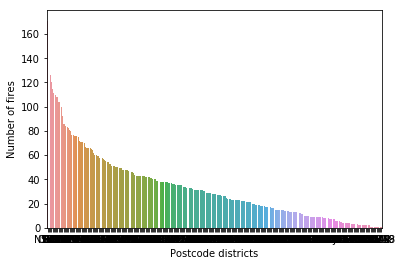

In [28]:
ax = sns.barplot(x="index", y="Postcode_district", data=fires_df.reset_index())
ax.set(xlabel="Postcode districts", ylabel='Number of fires')

In [29]:
# save to csv
fires_df.to_csv('fires_by_postcode.csv', header=False)

In [30]:
# number of fires per building type
fires_per_building = df_fires_properties_windowed.PropertyType.value_counts()
fires_building_df = pd.Series.to_frame(fires_per_building)
fires_building_df.head()

,PropertyType
House - single occupancy,2145
Purpose Built Flats/Maisonettes - Up to 3 storeys,1501
Purpose Built Flats/Maisonettes - 4 to 9 storeys,1174
Converted Flat/Maisonette - Up to 2 storeys,435
Converted Flat/Maisonettes - 3 or more storeys,397


In [31]:
# Are most of the fires in certainn buildings?
# What are the buildings with significant numbers of fires?
#fires_building_df = fires_building_df[fires_building_df > 500]
#fires_building_df.shape

In [32]:
fires_building_df.head()

,PropertyType
House - single occupancy,2145
Purpose Built Flats/Maisonettes - Up to 3 storeys,1501
Purpose Built Flats/Maisonettes - 4 to 9 storeys,1174
Converted Flat/Maisonette - Up to 2 storeys,435
Converted Flat/Maisonettes - 3 or more storeys,397


In [33]:
# plot the count of fires for different building types

[Text(0,0.5,'Number of fires'), Text(0.5,0,'Property Types')]

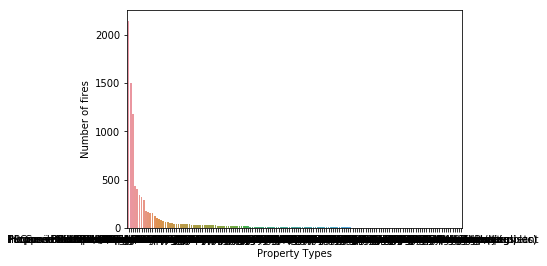

In [34]:
ax = sns.barplot(x="index", y="PropertyType", data=fires_building_df.reset_index())
ax.set(xlabel="Property Types", ylabel='Number of fires')

In [35]:
# TODO: Plot the areas and their indivdual fires as bubble plots?

In [36]:
# TODO: Check against number of houses in postcode to see risk, need to be proportionate to total number of houses 
# could also look at lower level granularity than postcode area

In [37]:
# TODO: visualise it by overlaying the data on a TOPOJSON map, tooling for variable time window.